## Project 2: Fashion-Mnist 👚

Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It is split in 10,000 as test and 50,000 as train datasets. Although the dataset is relatively simple, it can be used as the basis for learning and practicing how to develop, evaluate, and use deep convolutional neural networks for image classification from scratch.

### In this notebook:
#### 1. data prprocess.
#### 2. le-Net 5 model.
#### 3. Modify hyperparameters to get to the best performance with tuner.
#### 4. Evaluate the model using 5-fold cross-validation
#### 5. other two CNN models (using transfer learning):
  * ResNet152V2 model.
  * VGG16 model.


## 1. data preprocess 

import required libraries.

In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O.
import matplotlib.pyplot as plt # for visualization
import seaborn as sns
# iportant libraries for building the model.
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import backend as K
!pip install -q -U keras-tuner

import keras_tuner as kt


print('Num GPUs Available: ', len(tf.config.experimental.list_physical_devices('GPU')))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 3.9 MB/s eta 0:00:00
Num GPUs Available:  1


In [2]:
#reading the train/test csv file using pandas.
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
#see the shape of the data.
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [4]:
#display some of the training data.
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#display the describtion of the data
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
#see if there are any null in the data
train_df.isnull().sum().sum()

0

In [7]:

# check if there are any duplications.
train_df.duplicated().sum()

43

In [8]:
#drop duplicated data
train_df.drop_duplicates(subset=None, keep="first", inplace=True)

In [9]:
train_df.duplicated().sum()

0

In [10]:
# see count of every label to see if the data is balanced or not
train_df['label'].value_counts()

5    6000
8    6000
9    5998
0    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: label, dtype: int64

the data labels is balanced

<Axes: >

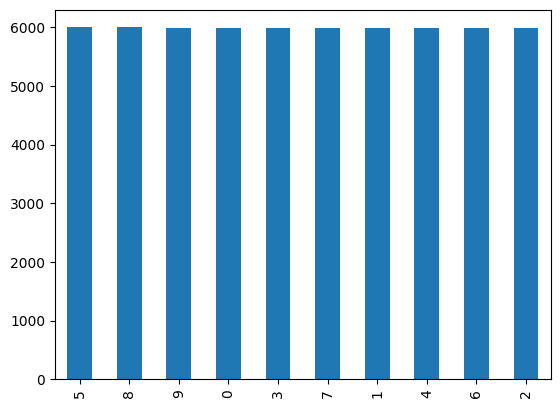

In [11]:
#visualize the label data count.
train_df['label'].value_counts().plot.bar()

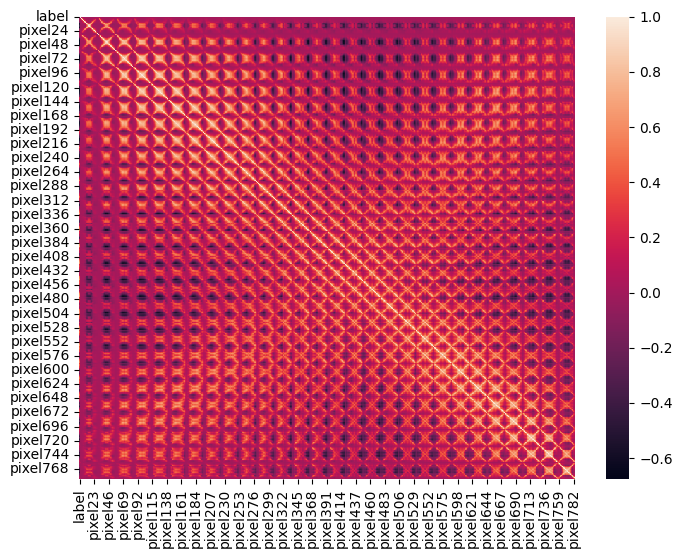

In [14]:
plt.figure(figsize=(8, 6))

# plotting correlation heatmap
dataplot = sns.heatmap(train_df.corr())
  
# displaying heatmap
plt.show()

In [10]:
#normalize the data by dividing the values by 255
train_data = np.asarray(train_df,dtype=np.float32)
test_data = np.asarray(test_df,dtype=np.float32)
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [11]:
# split the data into train and validation data subset.
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.25,random_state=43)

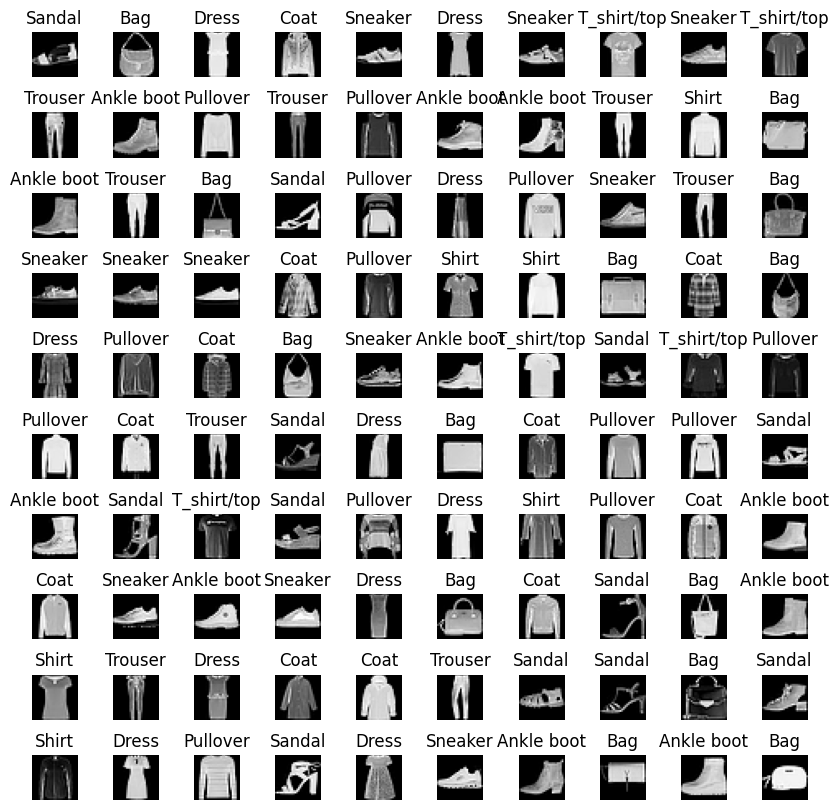

In [12]:
#visualize some of the images.
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.subplots_adjust(hspace=.7,wspace=0.8)
plt.show()

In [14]:
#encoding the label using the one hot encoder
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
val_labels = one_hot_encoder.transform(y_val.reshape(-1, 1))


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [17]:
#reshape the train and validation 
X_train = x_train.reshape(-1,28,28)
X_val = x_val.reshape(-1,28,28)
X_train.shape

(45000, 28, 28)

In [18]:
#apply padding to make the images shape compatable with the le-net input shape.
X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])/255
X_val = tf.pad(X_val, [[0, 0], [2,2], [2,2]])/255
X_train.shape

TensorShape([45000, 32, 32])

In [19]:
# extend the shape to make it 4-dim
X_train = tf.expand_dims(X_train, axis=3, name=None)
X_val = tf.expand_dims(X_val, axis=3, name=None)
X_train.shape

TensorShape([45000, 32, 32, 1])

In [20]:
#see the final shape
X_train.shape[1:]

TensorShape([32, 32, 1])

## 2. le-Net 5 model.
Lenet-5 is one of the earliest pre-trained models proposed by Yann LeCun and others in the year 1998, in the research paper Gradient-Based Learning Applied to Document Recognition.
* The first layer is the input layer with feature map size 32X32X1.

* Then we have the first convolution layer with 6 filters of size 5X5 and stride is 1. The activation function used at his layer is tanh. The output feature map is  28X28X6.

* Next, we have an average pooling layer with filter size 2X2 and stride 1. The resulting feature map is 14X14X6. Since the pooling layer doesn’t affect the number of channels.

* After this comes the second convolution layer with 16 filters of 5X5 and stride 1. Also, the activation function is tanh. Now the output size is 10X10X16.

* Again comes the other average pooling layer of 2X2 with stride 2. As a result, the size of the feature map reduced to 5X5X16.

* The final pooling layer has 120 filters of 5X5  with stride 1 and activation function tanh. Now the output size is 120.

* The next is a fully connected layer with 84 neurons that result in the output to 84 values and the activation function used here is again tanh.

* The last layer is the output layer with 10 neurons and  Softmax function. The Softmax gives the probability that a data point belongs to a particular class. The highest value is then predicted.

* This is the entire architecture of the Lenet-5 model. The number of trainable parameters of this architecture is around sixty thousand.

In [29]:
#build the le-net 5 model and fit it with the data after reshaping to fit the input shape of the network.
input_shape = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.build()
model.summary()
#compile the model.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#fit the model with the data.
history =model.fit(X_train, train_labels, batch_size=64,epochs=50, validation_data=(X_val, val_labels), callbacks=[callback])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 48)        38448     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 48)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1728)              0         
                                                                 
 dense_12 (Dense)            (None, 256)              

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


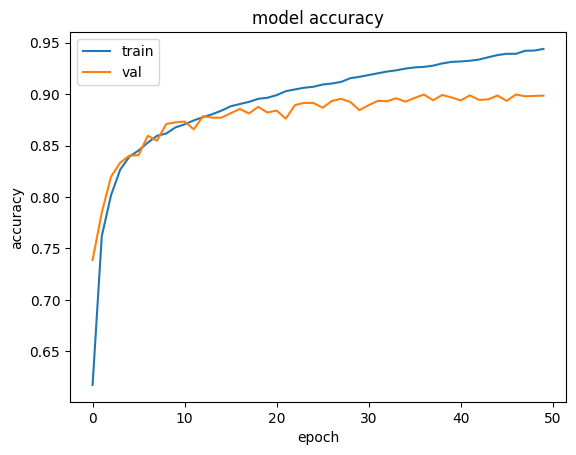

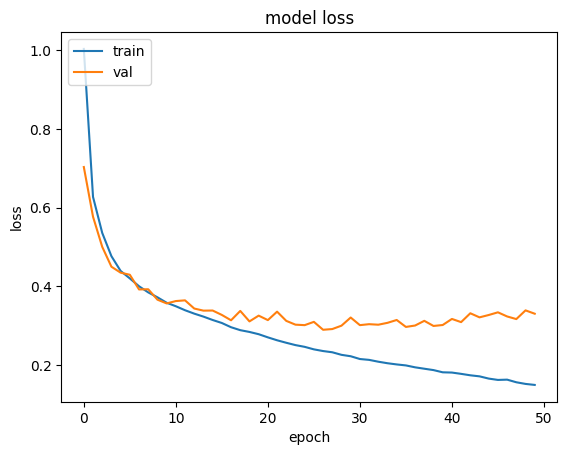

In [31]:
# plot graphs for the native archiecture
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 3. Modify hyperparameters to get to the best performance with tuner.

In [32]:
#using keras tuner to find the best hyperparameters to get bst performance.
input_shape = X_train.shape[1:]
def model_tuner(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('CONV_1_FILTER',min_value=32, max_value=64),
                     kernel_size=hp.Choice('KERNEL_1_FILTER', values=[3,5]),activation='relu',  padding='same',input_shape=(32,32,1)))
    
    model.add(MaxPooling2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(Conv2D(filters=hp.Int('CONV_2_FILTER',min_value=32, max_value=128),
                     kernel_size=hp.Choice('KERNEL_2_FILTER', values=[3,5]), activation='relu',padding='valid'))
    
    
    model.add(MaxPooling2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(hp.Float('DROPOUT_1', min_value=0.0,max_value=0.5,default=0.25,step=0.05)))

    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.build()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.compile(Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                    loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [34]:
tuner = kt.Hyperband(model_tuner,
                     objective='val_accuracy',
                     max_epochs=10, 
                     directory='models',
                     project_name='mnist')

In [35]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
CONV_1_FILTER (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 1, 'sampling': 'linear'}
KERNEL_1_FILTER (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
CONV_2_FILTER (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 1, 'sampling': 'linear'}
KERNEL_2_FILTER (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
DROPOUT_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [36]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, train_labels, epochs=20, validation_data=(X_val ,val_labels), callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 01m 23s]
val_accuracy: 0.8350666761398315

Best val_accuracy So Far: 0.883733332157135
Total elapsed time: 00h 21m 55s


In [37]:
fModel = tuner.hypermodel.build(best_hps)

In [38]:
fModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 47)        1222      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 47)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 48)        56448     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 117)       50661     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 117)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2925)             

In [39]:
#Creating a Model Checkpoint
from keras.callbacks import ModelCheckpoint
filepath="New\mnist1.hdf5"
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list_conv = [checkpoint_conv]
# Fitting the model
batch_size = 64
epochs = 30

#fit the model with best hyperparameters    
MODEL = fModel.fit(X_train, train_labels, batch_size=batch_size, steps_per_epoch = int(np.ceil(len(X_train)/float(batch_size))),epochs = epochs, 
                            validation_data =(X_val, val_labels),
                            shuffle = True,
                            callbacks=callbacks_list_conv)


Epoch 1/30
697/704 [============================>.] - ETA: 0s - loss: 0.9302 - accuracy: 0.6501
Epoch 1: val_accuracy improved from -inf to 0.74260, saving model to New\mnist1.hdf5
704/704 [==============================] - 6s 7ms/step - loss: 0.9285 - accuracy: 0.6508 - val_loss: 0.6829 - val_accuracy: 0.7426
Epoch 2/30
698/704 [============================>.] - ETA: 0s - loss: 0.6134 - accuracy: 0.7666
Epoch 2: val_accuracy improved from 0.74260 to 0.78560, saving model to New\mnist1.hdf5
704/704 [==============================] - 4s 6ms/step - loss: 0.6126 - accuracy: 0.7670 - val_loss: 0.5682 - val_accuracy: 0.7856
Epoch 3/30
697/704 [============================>.] - ETA: 0s - loss: 0.5098 - accuracy: 0.8094
Epoch 3: val_accuracy improved from 0.78560 to 0.81300, saving model to New\mnist1.hdf5
704/704 [==============================] - 5s 7ms/step - loss: 0.5092 - accuracy: 0.8096 - val_loss: 0.4953 - val_accuracy: 0.8130
Epoch 4/30
699/704 [============================>.] - ETA:

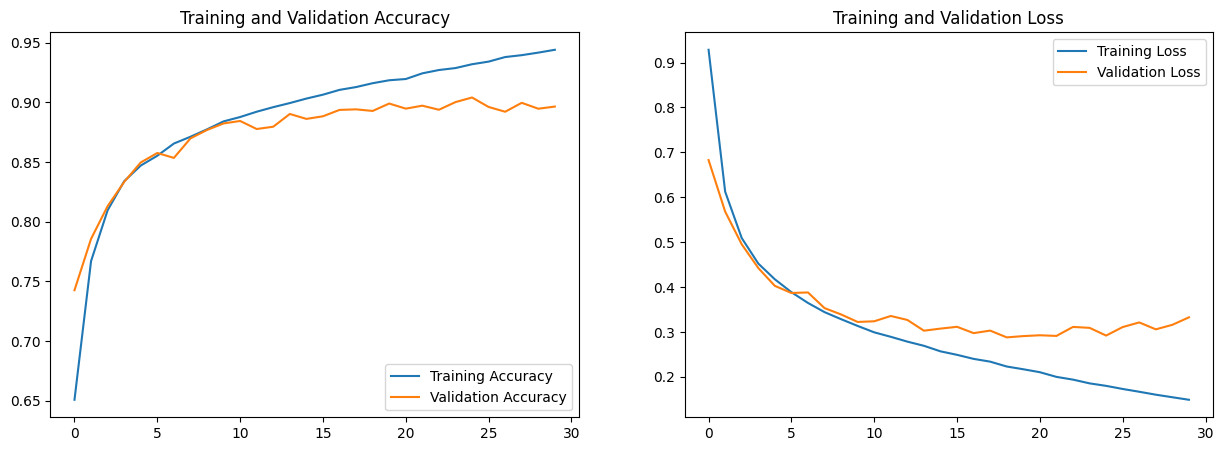

In [40]:
# display the accuracy/validation loss curves.
acc = MODEL.history['accuracy']
val_acc = MODEL.history['val_accuracy']

loss = MODEL.history['loss']
val_loss = MODEL.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 4. Evaluate the model using 5-fold cross-validation.

In [41]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def create_baseline():
    
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPooling2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = create_baseline()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        tf.debugging.set_log_device_placement(True)
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [42]:
X = np.concatenate((X_train, X_val), axis=0)
Y = np.concatenate((train_labels, val_labels), axis=0)
s,h=evaluate_model(X,Y)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.8906 - accuracy: 0.6630 - val_loss: 0.6853 - val_accuracy: 0.7434
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6031 - accuracy: 0.7674 - val_loss: 0.5550 - val_accuracy: 0.7936
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5180 - accuracy: 0.8047 - val_loss: 0.4942 - val_accuracy: 0.8181
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4641 - accuracy: 0.8289 - val_loss: 0.4596 - val_accuracy: 0.8285
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4275 - accuracy: 0.8420 - val_loss: 0.4176 - val_accuracy: 0.8445
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4026 - accuracy: 0.8513 - val_loss: 0.4245 - val_accuracy: 0.8418
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3820 - accuracy: 0.8589 - val_loss: 0.3805 - val_accuracy:

In [43]:
#display accuracies of every fold of the model.
s

[0.8685833215713501,
 0.8790833353996277,
 0.8634166717529297,
 0.8862500190734863,
 0.8550000190734863]

In [44]:
#plot every loss in the five folds in one curve.
from numpy import mean
from numpy import std
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='validate')
    plt.legend(["Train", "Validate"], loc ="lower right")    
    plt.show() # for losses 
     
    for i in range(len(histories)):

       # plot accuracy
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='validate') 
    plt.legend(["Train", "Validate"], loc ="lower right")    
    plt.show() # For Accuracy

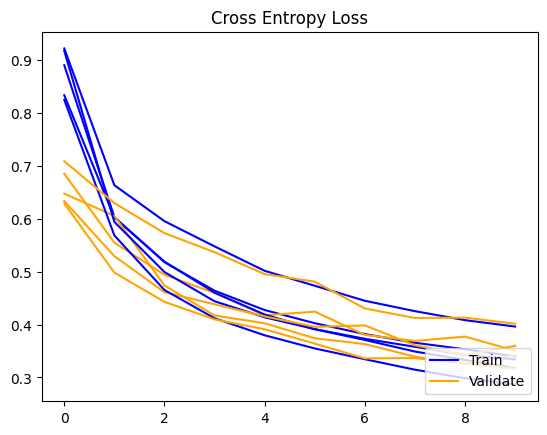

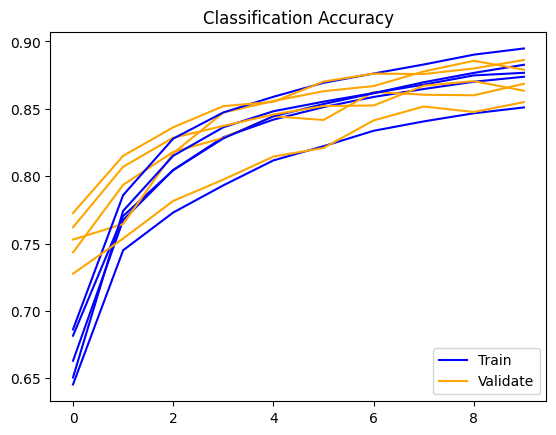

In [45]:
summarize_diagnostics(h)

## 5. other two CNN models (using transfer learning):
### 5.1 ResNet152V2 model:
ResNet model pre-trained on ImageNet-1k at resolution 224x224. It was introduced in the paper Deep Residual Learning for Image Recognition by He et al. Disclaimer. in this model we convert the shape to our image shape (32,32,1)



In [46]:
from keras.layers import Dense,Dropout,Flatten , Activation , Input
from keras.layers import  GlobalMaxPooling2D
from keras.applications import  VGG16 , ResNet152V2
from keras.models import Model
def ResNet_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(32, 32, 1))
    img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = ResNet152V2(weights='imagenet', include_top=False, input_tensor=img_conc)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    # x = Dense(1024, activation='relu')(x)
    # # adding a dropout layer
    # x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(512, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [47]:
resnet_model = ResNet_builder()
stop_early = tf.keras.callbacks.EarlyStopping(patience=5)
res_history = resnet_model.fit(X_train, train_labels, epochs=20, batch_size=50, validation_data=(X_val, val_labels), callbacks=[stop_early])

234545216/234545216 [==============================] - 11s 0us/step
Epoch 1/20
900/900 [==============================] - 49s 43ms/step - loss: 1.4015 - accuracy: 0.4638 - val_loss: 1.0604 - val_accuracy: 0.6032
Epoch 2/20
900/900 [==============================] - 31s 35ms/step - loss: 1.0640 - accuracy: 0.5918 - val_loss: 0.9619 - val_accuracy: 0.6396
Epoch 3/20
900/900 [==============================] - 32s 36ms/step - loss: 0.9949 - accuracy: 0.6222 - val_loss: 0.9534 - val_accuracy: 0.6293
Epoch 4/20
900/900 [==============================] - 33s 36ms/step - loss: 0.9538 - accuracy: 0.6390 - val_loss: 0.8453 - val_accuracy: 0.6857
Epoch 5/20
900/900 [==============================] - 36s 40ms/step - loss: 0.9210 - accuracy: 0.6527 - val_loss: 0.8153 - val_accuracy: 0.6969
Epoch 6/20
900/900 [==============================] - 45s 50ms/step - loss: 0.8885 - accuracy: 0.6684 - val_loss: 0.8324 - val_accuracy: 0.6927
Epoch 7/20
900/900 [==============================] - 37s 41ms/step 

In [53]:
# function for plotting the model accuracy/loss curves.
def display_accuracy(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracies')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def display_losses(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Losses')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def displayGraphs(history):
    display_accuracy(history)
    print()
    display_losses(history)

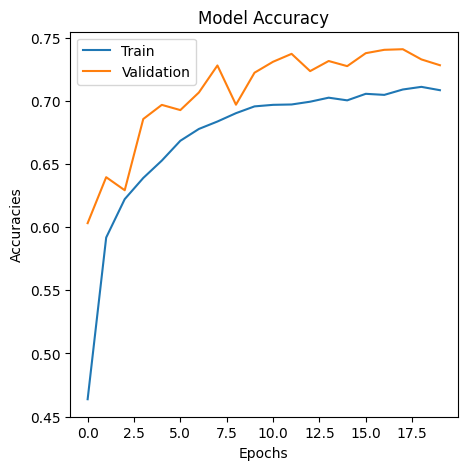

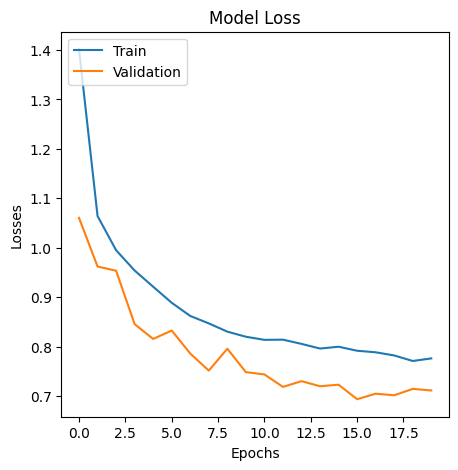

In [54]:
displayGraphs(res_history)

### 5.2 VGG16 model:
VGG16 is a convolutional neural network model that's used for image recognition. It's unique in that it has only 16 layers that have weights, as opposed to relying on a large number of hyper-parameters. It's considered one of the best vision model architectures.

In [59]:
def VGG16_builder():

    # convert the 1 dimension gray image to 3 duplicated dimensions to be able to pass them to the model
    img_input = Input(shape=(32, 32, 1))
    img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])  

    # create the base pre-trained model
    base_model = VGG16(weights='imagenet', include_top=False, input_tensor=img_conc)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    # adding a average pooling layer
    x = GlobalMaxPooling2D()(x)
    # adding a fully-connected layer with relu activation
    x = Dense(1024, activation='relu')(x)
    # # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(512, activation='relu')(x)
    # adding a dropout layer
    x = Dropout(0.4)(x)
    # adding a fully-connected layer with relu activation
    x = Dense(128, activation='relu')(x)
    # adding the output layer which has 10 classes with a softmax
    predictions = Dense(10, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [60]:
VGG16_model = VGG16_builder()
stop_early = tf.keras.callbacks.EarlyStopping(patience=5)
vgg_history = VGG16_model.fit(X_train, train_labels, epochs=20, batch_size=50, validation_data=(X_val, val_labels), callbacks=[stop_early])

Epoch 1/20
900/900 [==============================] - 15s 15ms/step - loss: 2.3072 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.0996
Epoch 2/20
900/900 [==============================] - 16s 17ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 3/20
900/900 [==============================] - 15s 17ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0991
Epoch 4/20
900/900 [==============================] - 15s 17ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 5/20
900/900 [==============================] - 15s 17ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1020
Epoch 6/20
900/900 [==============================] - 13s 14ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0968
Epoch 7/20
900/900 [==============================] - 15s 17ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy:

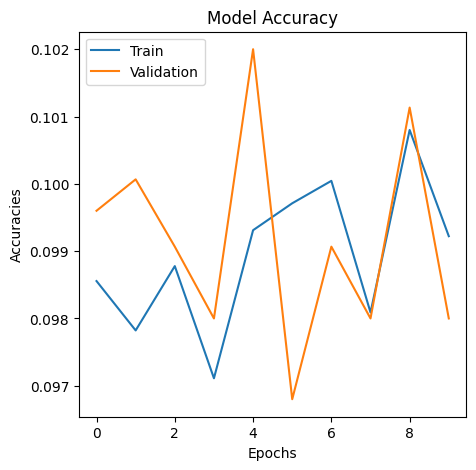

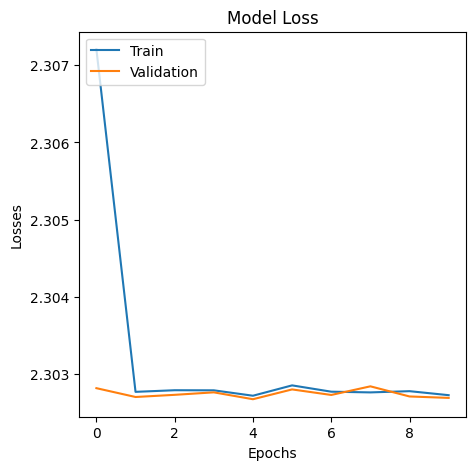

In [62]:
displayGraphs(vgg_history)

As we can see, when we applied transfer learning, the accuracy decreased.
Transfer learning may fail if there is a domain mismatch between the dataset for pretext tasks and the dataset for downstream tasks. Although the pre-trained models may converge, they will become trapped in a local minimum. As a result, the performance will be no better than starting from scratch.

Thanks 😀